# Model Deployment 

##  Setting up the notebook

In [1]:
# importing the necossery liberay 

import sagemaker
from sagemaker import get_execution_role


import os
import boto3
import json
import numpy as np
import tensorflow as tf

from pickle import load

In [2]:
# This is an object that represents the SageMaker session that we are currently operating in. This
# object contains some useful information that we will need to access later such as our region.
sm_session = sagemaker.Session()

# This is an object that represents the IAM role that we are currently assigned. When we construct
# and launch the training job later we will need to tell it what IAM role it should have. Since our
# use case is relatively simple we will simply assign the training job the role we currently have.
role = get_execution_role()

## Deploy the trained model using 


### reference documentataion & useful links  :

https://docs.aws.amazon.com/sagemaker/latest/dg/neo-deployment-hosting-services-prerequisites.html
    
https://sagemaker.readthedocs.io/en/stable/frameworks/tensorflow/deploying_tensorflow_serving.html 
    
https://sagemaker.readthedocs.io/en/stable/frameworks/tensorflow/deploying_tensorflow_serving.html 

https://github.com/aws/sagemaker-python-sdk/blob/6acde94c286087d2d1d991bef28a63a47f53810a/src/sagemaker/predictor.py


In [3]:

s3_model_location =  's3://sagemaker-us-east-1-478270364551/tensorflow-training-2021-03-13-05-09-45-794/output/model.tar.gz'

In [4]:

from sagemaker.tensorflow import TensorFlowModel


model = TensorFlowModel(
                         model_data= s3_model_location ,
                         role = role,
                         framework_version='2.1.0',
                         entry_point='inference.py',
                         source_dir='server',
                         sagemaker_session= sm_session,
                        )


In [5]:
predictor = model.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

update_endpoint is a no-op in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


---------------!

In [8]:

predictor.endpoint

The endpoint attribute has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


'tensorflow-inference-2021-03-13-10-53-35-650'

## Test the working 

In [9]:
## setup to invoke endpoint
sm_runtime_client = boto3.client('sagemaker-runtime')

In [10]:
from PIL import Image
path = 'sample.jpg'

img =  Image.open(path)

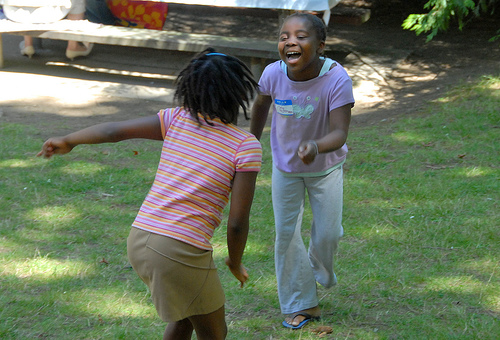

In [12]:
from IPython.display import Image 

display(Image(filename= path))

In [13]:

newsize = (224, 224) # chenging the size of the image to the required size 
img = img.resize(newsize) 


In [14]:
import numpy as np 

img= np.asarray(img)
img.shape

(224, 224, 3)

In [15]:
image_list = img.tolist()
image_json = json.dumps(image_list)

In [16]:
## invoke endpoint for inference
response = sm_runtime_client.invoke_endpoint(
                                            EndpointName=predictor.endpoint,
                                            Body=image_json,
                                            ContentType="application/json",
                                            )


The endpoint attribute has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [17]:
json.loads(response['Body'].read().decode('utf-8'))

'two girls are playing in the surf'

## Delete the endpoint (if not needed)

In [18]:
predictor.delete_endpoint()